In [9]:
from sklearn.datasets import fetch_lfw_people
import sklearn
from sklearn.decomposition import PCA
faces = fetch_lfw_people(min_faces_per_person=50)
import numpy as np

# Who are these people?!
print(faces.target_names)


# What do their faces look like?
print(faces.images.shape)


# The target name index for each image (0 = Ariel Sharon, etc)
print(faces.target.shape)


print(faces.target)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder']
(760, 62, 47)
(760,)
[1 1 0 1 0 1 1 1 2 1 0 1 1 2 2 1 2 1 0 1 1 2 1 1 1 1 1 2 1 1 1 1 0 1 1 1 0
 1 1 1 2 1 1 0 1 2 1 0 1 1 1 1 1 1 2 0 1 2 1 0 1 0 1 0 1 1 2 1 1 0 1 2 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 2 0 1 1 0 1 1 2 0 2 1 2 0 1 1 2 1 1 1 0 1 0 1 0
 2 1 1 2 1 1 1 0 1 0 2 2 2 1 0 1 2 1 1 1 1 0 1 1 2 1 1 1 0 2 1 1 1 1 1 0 1
 1 1 1 1 2 1 1 0 1 1 1 0 2 1 0 0 1 1 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 0 1 0 1
 1 1 1 2 1 1 2 2 1 0 1 0 1 0 2 1 1 1 1 0 1 1 1 1 1 0 0 0 1 2 1 1 1 1 2 1 1
 1 1 0 2 1 1 1 1 0 0 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 0 1 1 0 0 2 0 1 0 1 1 2 1 1 0 0 0 1 2 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1
 1 1 1 1 2 1 0 1 0 1 2 1 2 1 1 1 1 0 1 1 2 1 1 1 1 1 0 1 1 0 1 1 1 1 0 2 0
 1 1 1 1 0 2 1 2 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 0 1 1 1 2 1 0 0
 1 1 0 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 0 1 1 1 1 2 0
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 2 1 0
 2 2 0 1 1 1 2 1 1 2 1 

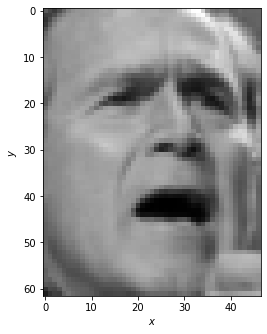

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 4.75))
ax.imshow(faces.images[12], cmap="binary_r")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
fig.tight_layout()

## Question 2

You are tasked with performing dimensionality reduction on a set of images of human faces. In this question you will use an existing package to do the PCA for you. Remember that if you were to do this yourself, your data must be mean-centered and unit variance in every dimension before you do PCA!



TASK ONE

Use PCA to fit these images (  sklearn.decomposition.PCA ) and find the first 150 principal components. You will find that the dimensionality of this data is large, so vanilla PCA will have a hard time. Use the 'random' algorithm as the SVD solver, which takes random subsets of the data to find the first 
N
 components. Make a figure showing the first 50 components (eigenfaces) as images, with one image per panel

(760, 2914)


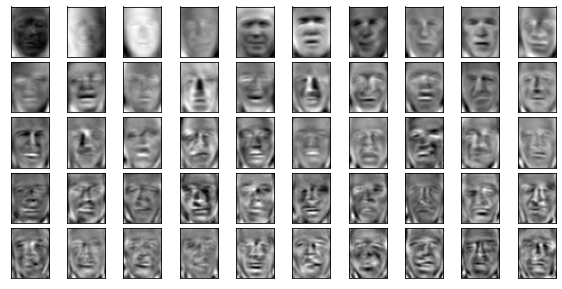

In [11]:
pca = sklearn.decomposition.PCA(n_components=150, svd_solver='randomized', whiten=True)
print(faces.data.shape)
pca.fit_transform(faces.data)

eigenfaces = pca.components_[:150]

#Plot the eigenfaces (each of the pca components)
fig, axes = plt.subplots(5, 10, figsize=(10, 5),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    axes.flat[i].imshow(eigenfaces[i].reshape(62,47),cmap="binary_r")

TASK TWO

Plot the cumulative explained variance as a function of the number of principal components.



Text(0.5, 1.0, 'Plot of Cumulative Explained Variance vs Number of Principal Components')

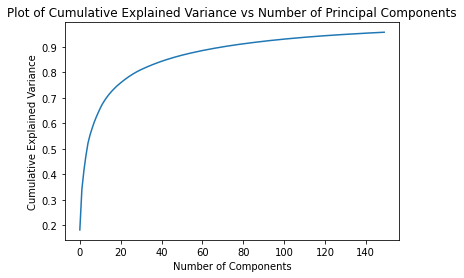

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Plot of Cumulative Explained Variance vs Number of Principal Components')

TASK THREE

Use PCA to compute the contributions from the first 150 principal components for every data point. You should have an array that is 1,560 by 150 (the number of images by the number of components). Now use these components to take an inverse transform with PCA, to show projected images using only those 150 components. For each person in the data set, plot an original image of them compared to the reconstructed image using 150 principal components.

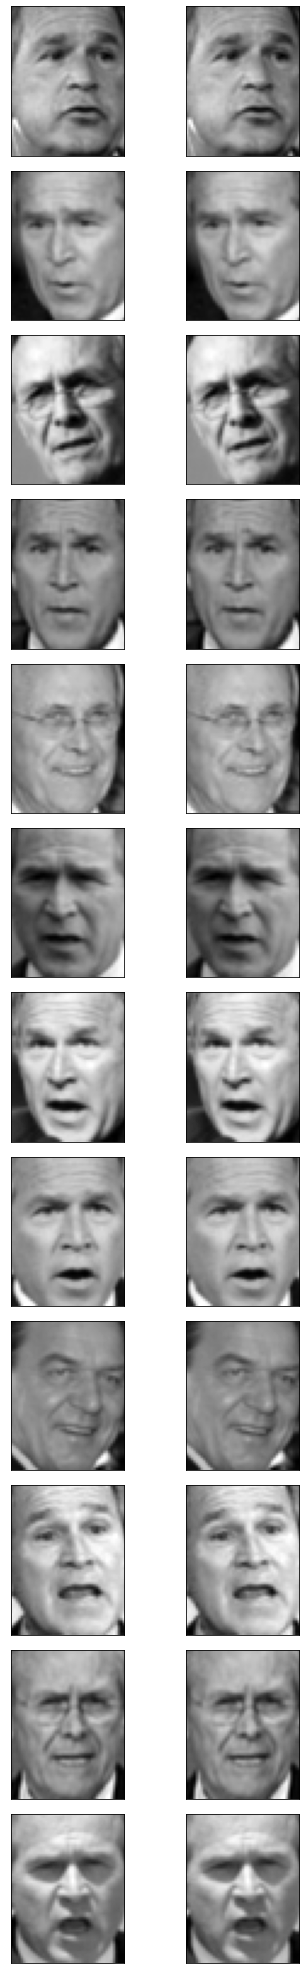

In [30]:
transform = pca.transform(faces.data)
inv_transform = pca.inverse_transform(transform)

name_index = []

reshaped_data = faces.data.reshape(760, 62, 47)
for i in range(12):
    index = np.where(faces.target==i)
    name_index.append(index)

fig3, ax3 = plt.subplots(12, 2, figsize=(6, 36),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1)) 


for j in range(len(name_index)):
        ax3[j][0].imshow(faces.images[j], cmap="binary_r")
        ax3[j][1].imshow(reshaped_data[j], cmap="binary_r")
    

    